# Taller 3: Exploratory Data Analysis (EDA)

**Dataset:** Forbes Global 2000 (2025)  
**Archivo:** `Forbes_2000_Companies_2025.csv`  
**Generado:** 2025-09-03 00:02:11

Este cuaderno realiza un EDA completo siguiendo los pasos solicitados.


## 1. Entender la necesidad

**Objetivo:** Comprender los factores asociados al tamaño y desempeño financiero de las compañías del ranking Forbes Global 2000 (2025).  
Preguntas guía:
- ¿Cómo se distribuyen las métricas financieras clave?  
- ¿Qué países e industrias concentran más compañías y mayor valor?
- ¿Qué relaciones existen entre variables financieras?
- ¿Qué métricas derivadas ayudan a interpretar el desempeño?


## 2. Descargar y abrir los datos

El archivo CSV ya está disponible localmente. Se carga con **pandas**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# === 2) Carga de datos ===
df_companies = pd.read_csv("Forbes_2000_Companies_2025.csv", sep=';', engine="python", encoding="utf-8")
df_companies.head()


,Rank,Company,Headquarters,Industry,Sales ($B),Profit ($B),Assets ($B),Market Value ($B)
0,1,JPMorganChase,United States,Banking,285.11,59.36,"4,357.86",677.8
1,2,Berkshire Hathaway,United States,Insurance,371.43,89,"1,153.88","1,145.46"
2,3,ICBC,China,Banking,221.96,50.84,"6,688.6",251.33
3,4,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,Oil & Gas Operations,480.15,104.97,645.03,"1,663.38"
4,5,Amazon,United States,Retail and Wholesale,637.96,59.25,624.89,"2,005.64"


## 3. Limpieza de la base de datos

- Estandarizar nombres de columnas a **snake_case**.  
- Remover duplicados.  
- Convertir a numérico columnas con símbolos (`$`, `,`, etc.).  
- Resumen de valores faltantes.


In [4]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               2000 non-null   int64  
 1   Company            2000 non-null   object 
 2   Headquarters       2000 non-null   object 
 3   Industry           2000 non-null   object 
 4   Sales ($B)         2000 non-null   float64
 5   Profit ($B)        2000 non-null   object 
 6   Assets ($B)        2000 non-null   object 
 7   Market Value ($B)  2000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 125.1+ KB


In [5]:
df = df_companies.copy()

before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f"Deleted Duplicate Data: {before - after}")



Deleted Duplicate Data: 0


## 4. Transformaciones (10%)

### Parsing Strings to Float24

In [6]:
df_companies.isnull().sum()

Rank                 0
Company              0
Headquarters         0
Industry             0
Sales ($B)           0
Profit ($B)          0
Assets ($B)          0
Market Value ($B)    0
dtype: int64

In [15]:
df_companies[['Profit ($B)','Assets ($B)','Market Value ($B)']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Profit ($B)        2000 non-null   object
 1   Assets ($B)        2000 non-null   object
 2   Market Value ($B)  2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [10]:
for col in ['Profit ($B)', 'Assets ($B)', 'Market Value ($B)']:
    df_companies[col] = df_companies[col].str.replace(",", "")


In [14]:
df_companies[['Profit ($B)','Assets ($B)','Market Value ($B)']]

,Profit ($B),Assets ($B),Market Value ($B)
0,59.36,4357.86,677.8
1,89,1153.88,1145.46
2,50.84,6688.6,251.33
3,104.97,645.03,1663.38
4,59.25,624.89,2005.64
...,...,...,...
1995,0.3781,3.16,13.84
1996,0.0784,1.99,0.559
1997,0.6288,7.95,3.93
1998,0.0927,42.56,0.679


In [23]:
result_profit = df_companies['Profit ($B)'].str.count('\.') > 1
result_profit.sum()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\seboc\AppData\Local\Temp\ipykernel_26008\1524475582.py:1: SyntaxWarning: invalid escape sequence '\.'
  result_profit = df_companies['Profit ($B)'].str.count('\.') > 1


2

In [ ]:
result_assets = df_companies['Assets ($B)'].str.count('\.') > 1
result_assets.sum()

In [ ]:
result_market = df_companies['Market Value ($B)'].str.count('\.') > 1
result_market.sum()

### Cálculo de métricas derivadas:


- `profit_margin = profits / sales`
- `market_to_assets = market_value / assets`
- `asset_turnover = sales / assets`

In [4]:
# === 4) Transformaciones ===
def find_col(alias_list):
    for col in df.columns:
        for a in alias_list:
            if a in col:
                return col
    return None

sales_col   = find_col(["sales", "revenue"])
profits_col = find_col(["profit", "net_income"])
assets_col  = find_col(["asset"])
mv_col      = find_col(["market_value", "market_cap"])

if profits_col and sales_col:
    df["profit_margin"] = df[profits_col] / df[sales_col]
if mv_col and assets_col:
    df["market_to_assets"] = df[mv_col] / df[assets_col]
if sales_col and assets_col:
    df["asset_turnover"] = df[sales_col] / df[assets_col]

df.head()


,rank,company,headquarters,industry,sales__$b_,profit__$b_,assets__$b_,market_value__$b_,profit_margin,market_to_assets,asset_turnover
0,1,JPMorganChase,United States,Banking,285.1100,59.3600,"4,357.8600",677.8000,0.2082,0.1555,0.0654
1,2,Berkshire Hathaway,United States,Insurance,371.4300,89.0000,"1,153.8800","1,145.4600",0.2396,0.9927,0.3219
2,3,ICBC,China,Banking,221.9600,50.8400,"6,688.6000",251.3300,0.2291,0.0376,0.0332
3,4,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,Oil & Gas Operations,480.1500,104.9700,645.0300,"1,663.3800",0.2186,2.5788,0.7444
4,5,Amazon,United States,Retail and Wholesale,637.9600,59.2500,624.8900,"2,005.6400",0.0929,3.2096,1.0209


## 5. Exploratorio Inicial (40%)

Incluye:
- Estadísticas descriptivas de variables numéricas.  
- Histogramas (univariado).  
- Conteos por categorías principales (país/industria si existen).  
- Dispersión (bivariado) y matriz de correlación.  


In [5]:
# === 5.1 Descriptivas ===
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
df[numeric_cols].describe().T if numeric_cols else pd.DataFrame()


,count,mean,std,min,25%,50%,75%,max
rank,"2,000.0000","1,000.3310",577.4301,1.0000,500.7500,"1,000.5000","1,500.2500","1,998.0000"
sales__$b_,"2,000.0000",26.4416,47.9281,-21.4700,6.1475,12.9500,25.7075,680.9900
profit__$b_,"1,998.0000",2.4371,6.8629,-21.6500,0.5212,1.0100,2.2375,111.0000
assets__$b_,"2,000.0000",121.0873,395.7549,0.1810,15.7550,33.8750,78.8200,"6,688.6000"
market_value__$b_,"2,000.0000",45.6418,154.5118,0.1750,8.3075,17.2050,37.3475,"3,143.8200"
profit_margin,"1,998.0000",inf,NaN,-2.5270,0.0406,0.1007,0.1841,inf
market_to_assets,"2,000.0000",1.3424,3.0681,0.0004,0.1441,0.5210,1.3944,73.2198
asset_turnover,"2,000.0000",0.6091,0.6969,-0.4826,0.1436,0.4628,0.8030,12.3514


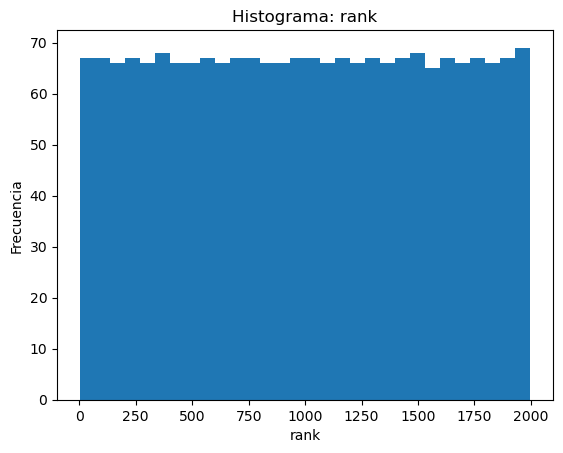

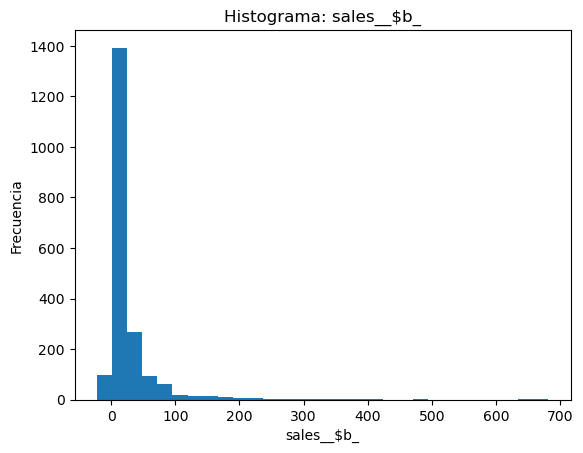

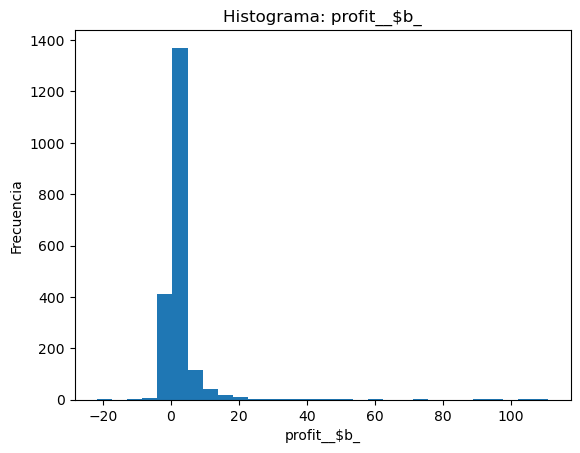

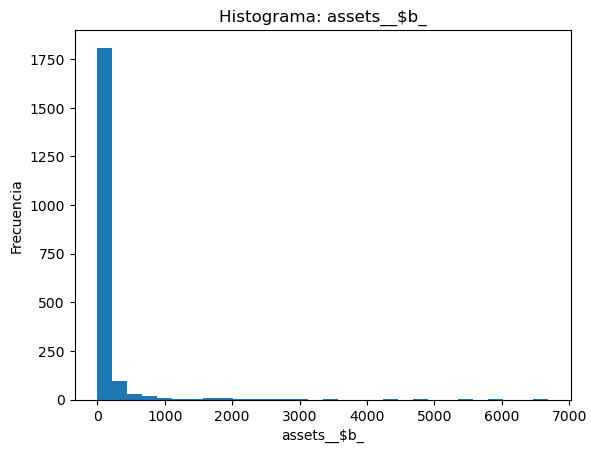

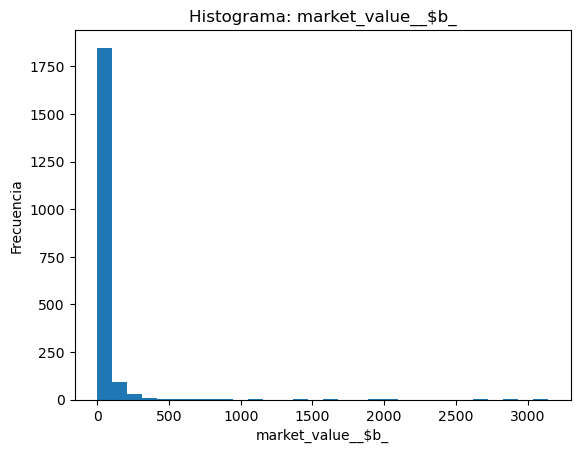

ValueError: supplied range of [-2.5269978401727857, inf] is not finite

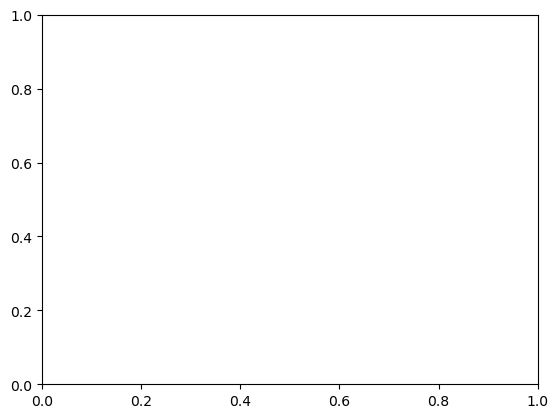

In [6]:
# === 5.2 Univariado: histogramas ===
import matplotlib.pyplot as plt

to_plot = numeric_cols[:6]  # limitar a 6 para evitar exceso
for c in to_plot:
    plt.figure()
    plt.hist(df[c].dropna(), bins=30)
    plt.title(f"Histograma: {c}")
    plt.xlabel(c); plt.ylabel("Frecuencia")
    plt.show()

# Categóricas (industry/sector/country) si existen
cat_cols = [c for c in df.columns if df[c].dtype == object]
def first_match(aliases):
    for col in cat_cols:
        for a in aliases:
            if a in col:
                return col
    return None

industry_col = first_match(["industry", "sector"])
country_col  = first_match(["country"])

for target in [industry_col, country_col]:
    if target:
        counts = df[target].value_counts().head(15)
        plt.figure()
        counts.plot(kind="bar")
        plt.title(f"Top 15 {target} por frecuencia")
        plt.xlabel(target); plt.ylabel("Conteo")
        plt.tight_layout()
        plt.show()


In [ ]:
# === 5.3 Bivariado: scatter ===
def resolve_col(alias_options):
    for col in df.columns:
        for alias in alias_options:
            if alias in col:
                return col
    return None

assets_real = resolve_col(["asset"])
mv_real     = resolve_col(["market_value", "market_cap"])
sales_real  = resolve_col(["sales", "revenue"])
profits_real= resolve_col(["profit", "net_income"])

def scatter_if_exists(xc, yc, title):
    if xc and yc and pd.api.types.is_numeric_dtype(df[xc]) and pd.api.types.is_numeric_dtype(df[yc]):
        plt.figure()
        plt.scatter(df[xc], df[yc], alpha=0.6)
        plt.title(title)
        plt.xlabel(xc); plt.ylabel(yc)
        plt.tight_layout()
        plt.show()

scatter_if_exists(assets_real, mv_real, f"Scatter: {assets_real} vs {mv_real}")
scatter_if_exists(sales_real, profits_real, f"Scatter: {sales_real} vs {profits_real}")


In [ ]:
# === 5.4 Correlaciones ===
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    plt.imshow(corr, aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title("Matriz de correlaciones (numéricas)")
    plt.tight_layout()
    plt.show()

    corr_abs = corr.abs().copy()
    corr_abs.values[np.tril_indices_from(corr_abs)] = np.nan
    top_pairs = (
        corr_abs.unstack()
        .dropna()
        .sort_values(ascending=False)
        .head(10)
    )
    print("Top correlaciones absolutas:")
    display(top_pairs)
else:
    print("No hay suficientes columnas numéricas para una correlación útil.")


In [ ]:
# === 5.5 Resúmenes por grupo (industry/country) ===
def first_match_col(aliases):
    for col in df.columns:
        for a in aliases:
            if a in col:
                return col
    return None

industry_col = first_match_col(["industry", "sector"])
country_col  = first_match_col(["country"])

metrics = [c for c in ["sales","profits","assets","market_value","profit_margin","market_to_assets","asset_turnover"] if c in df.columns]
if industry_col and metrics:
    display(df.groupby(industry_col)[metrics].mean(numeric_only=True).sort_values(by=metrics[0], ascending=False).head(15))
if country_col and metrics:
    display(df.groupby(country_col)[metrics].mean(numeric_only=True).sort_values(by=metrics[0], ascending=False).head(15))


## 6. Análisis y conclusiones (50%)

Interpreta los resultados, responde las preguntas y propone recomendaciones.  
Abajo se genera un **borrador** de hallazgos automáticos para que lo ajustes con tu criterio.


In [ ]:
# === Borrador de conclusiones automáticas ===
findings = []

# Correlaciones destacadas
if 'corr' in locals():
    corr_copy = corr.copy()
    corr_copy.values[np.tril_indices_from(corr_copy)] = np.nan
    top = corr_copy.unstack().dropna().sort_values(ascending=False).head(5)
    if not top.empty:
        findings.append("**Top correlaciones (lineales) entre variables numéricas:**")
        for (a,b), v in top.items():
            findings.append(f"- {a} ↔ {b}: {v:.3f}")

# Industrias/países si existen
def fm(aliases):
    for col in df.columns:
        for a in aliases:
            if a in col:
                return col
    return None

industry_col = fm(["industry","sector"])
country_col  = fm(["country"])
mv_col       = fm(["market_value","market_cap"])
pm_col       = "profit_margin" if "profit_margin" in df.columns else None

def top_group(colname, metric, k=5):
    if colname and metric and colname in df.columns and metric in df.columns:
        t = df.groupby(colname)[metric].mean(numeric_only=True).sort_values(ascending=False).head(k)
        return t
    return None

if mv_col:
    top_ind = top_group(industry_col, mv_col, 5)
    top_cty = top_group(country_col, mv_col, 5)
    if top_ind is not None and len(top_ind) > 0:
        findings.append(f"**Industrias con mayor {mv_col} promedio (Top 5):**")
        for idx, val in top_ind.items():
            findings.append(f"- {idx}: {val:,.2f}")
    if top_cty is not None and len(top_cty) > 0:
        findings.append(f"**Países con mayor {mv_col} promedio (Top 5):**")
        for idx, val in top_cty.items():
            findings.append(f"- {idx}: {val:,.2f}")

if pm_col and industry_col:
    pm_ind = df.groupby(industry_col)[pm_col].mean(numeric_only=True).sort_values(ascending=False).head(5)
    if len(pm_ind) > 0:
        findings.append("**Industrias con mayor margen de utilidad promedio (Top 5):**")
        for idx, val in pm_ind.items():
            findings.append(f"- {idx}: {val:.2%}")

from IPython.display import Markdown
Markdown("\\n".join(findings) if findings else "Agrega aquí tus conclusiones basadas en el análisis.")
